# Deep Learning - Report 2
This is a template notebook of your report. Please complete your report with your teammate following these instructions:
- Work on the exercises below by filling the notebook.
- **Rename your notebook** in the format `FirstName1FAMILYNAME1_FirstName2FAMILYNAME2_report2.ipynb`. For example, when the team consists of Johann FAOUZI and Ikko Yamane, the file name should look like `JohannFAOUZI_IkkoYAMANE_report2.ipynb`.
- You are only allowed to edit new cells you have added (except the "Solution to Exercise 0" cell).
- Write `### Answer to Question (number)` or `### Solution to Exercise (number)` at the beginning of each cell you add.
- Please submit your notebook on Moodle.
- The submission deadline is 18:00 (UTC+2) of December 6, 2023.
- Explain your code with comments or/and Markdown text. The explanations will be taken into account for the evaluation.
- Needless to say, do not copy solutions from other students.

## Exercise 0
- Rename your notebook in the format `FirstName1FAMILYNAME1_FirstName2FAMILYNAME2_report2.ipynb`.
- Write your names and email addresses.

### Solution to Exercise 0
- Name of Author 1: GANIYU Isaac
- Name of Author 2: DECROS Florian
- Email address of Author 1: isaac.ganiyu@eleve.ensai.fr
- Email address of Author 2: florian.decros@eleve.ensai.fr

## Part 1: Questions

### Question 1
Describe the computation environment (SSP Cloud Datalab, Google Colab, etc.) that you use for this report.

### Answer to Question 1

Google colab is a free cloud-based platform provided by Google. It allows to write and run any Python code via the browser. Colab is a hosted service for Jupyter notebooks that requires no configuration and provides free access to computing resources, including GPUs. For this report, the execution type we will be using is T4 GPU.
The computations run on virtual machines hosted on Google Cloud.


### Question 2
What is the _learning rate_ (or _step size_) of the stochastic gradient descent (SGD)?
What issue can happen when it is too large?

### Answer to Question 2

The learning rate in stochastic gradient descent is a hyperparameter that determines the size of the steps taken during the optimization process. It is essentially a scalar multiplier that is applied to the computed gradient of the loss function (or a function of it) with respect to the model parameters.

It essentially controls the magnitude of the updates to the model weights in each iteration. If it's too large, it can lead to convergence issues and divergence instead of converging to a minimum. The updates to the weights become so large that the optimization process overshoots the minimum. In other words, it causes the algorithm to take steps that are too big, potentially skipping over the minimum of the loss function, leading to oscillations or instability.

### Question 3
For what purposes can we use
- convolution layers
- and transposed convolution layers,
respectively.

### Answer to Question 3

We can use convolution layers for:

- Feature extraction in image Processing: Convolutional layers are widely used for feature extraction in image processing tasks. They apply filters (kernels) to the input data, capturing different features such as edges, textures, and patterns.
- CNN Architecture: Convolutional layers are the building blocks of CNNs. They allow the network to learn hierarchical representations of the input data, capturing low-level features in early layers and high-level features in deeper layers.
- Object Recognition: Convolutional layers contribute to translation-invariant feature learning, making CNNs suitable for object recognition tasks where the spatial arrangement of features is important.

We can use transposed convolution layers for :

- Upsampling and Reconstruction for image Generation: Transposed convolutional layers are often used for upsampling and reconstruction tasks. They help increase the spatial resolution of the input, making them valuable in image generation tasks like image super-resolution or image-to-image translation.
- Segmentation Networks: Transposed convolutional layers are commonly employed in semantic segmentation networks. They help generate pixel-wise predictions by upsampling feature maps to the original input resolution.
- Generative Adversarial Networks (GANs): In GANs and other generative models, transposed convolutional layers are used in the generator network to transform low-dimensional noise into high-dimensional data, such as images.

### Question 4
What is a _kernel_ of a convolution layer?

###Answer to Question 4
A kernel or filter is a matrix used for the convolution operation. It is the learnable parameters of the convolutional layer that are used to extract features from the input data.

A two dimensional convolution operation has the equation :     
$(H*W)_{i,j}=\sum_{k=1}^{M_w}\sum_{l=1}^{N_w}H_{i+k,j+l}W_{k,l}$

In this equation, H represents the input of the previous layer and W represents the kernel

### Question 5
What is a _hidden state_ of a recurrent neural network (RNN)? How is it used?

### Answer to question 5


In a Recurrent Neural Network (RNN), the hidden state is an internal representation or a memory of the network's previous computations. It allows the network to capture and remember information from previous time steps. The sequence of hidden states is defined as folows :

\$h_t= f(h_{t-1}, x_t)$

$h_t = f(h_{t-1}, x_t})$




### Question 6
Discuss an advantage of Transformers over RNNs with regard to computational cost.

### Answer to Question 6

From a computational point of view, RNN require sequential calculation in training. On the other hand, Transformers works with parallel training, this is efficient with GPUs and allows to greatly reduce computation time.

## Part 2: Human Activity Recognition with a Gated Reccurent Unit (GRU) Network
### Exercise 1
Train a classifier using a Gated Reccurent Unit (GRU) network with the [Human Activity Recognition](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones) dataset. You can refer to the notebook from the 4th atelier. We encourage you to add comments and explanations to your code.

### Solution to Exercise 1

In [ ]:
### Solution to Exercise 1

import numpy as np


def load_dataset(train, path='data'):
    """Load the dataset.

    Parameters
    ----------
    train : bool
        If true, returns the training set. Otherwise, returns the test set.

    Returns
    -------
    X : array, shape = (n_samples, 9, 128)
        Input samples.

    y : array, shape = (n_samples,)
        Target samples.

    subject : array, shape = (n_samples,)
        Subject identifiants.

    """
    import os
    import zipfile

    # Download the dataset if necessary
    if not os.path.isfile(os.path.join(path, 'human+activity+recognition+using+smartphones.zip')):
        from urllib.request import urlretrieve

        if not os.path.exists(path):
            os.makedirs(path)

        url = 'https://archive.ics.uci.edu/static/public/240/human+activity+recognition+using+smartphones.zip'
        urlretrieve(url, os.path.join(
            path, 'human+activity+recognition+using+smartphones.zip'
        ))

    if not os.path.isfile(os.path.join(path, 'UCI HAR Dataset.zip')):
        with zipfile.ZipFile(
            os.path.join(path, 'human+activity+recognition+using+smartphones.zip'), 'r'
        ) as zip_ref:
            zip_ref.extractall(path)

    if not os.path.isdir(os.path.join(path, 'UCI HAR Dataset')):
        with zipfile.ZipFile(os.path.join(path, 'UCI HAR Dataset.zip'), 'r') as zip_ref:
            zip_ref.extractall(path)

    set_ = 'train' if train else 'test'
    file_names = [
            f'body_acc_x_{set_}.txt', f'body_acc_y_{set_}.txt', f'body_acc_z_{set_}.txt',
            f'body_gyro_x_{set_}.txt', f'body_gyro_y_{set_}.txt', f'body_gyro_z_{set_}.txt',
            f'total_acc_x_{set_}.txt', f'total_acc_y_{set_}.txt', f'total_acc_z_{set_}.txt',
        ]

    # Input data
    X = np.asarray([
        np.loadtxt(os.path.join(path, 'UCI HAR Dataset', set_, 'Inertial Signals', file)) for file in file_names
    ])
    X = np.transpose(X, (1, 2, 0))

    # Output data
    y = np.loadtxt(os.path.join(path, 'UCI HAR Dataset', set_, f'y_{set_}.txt'))

    # Subjects
    subject = np.loadtxt(os.path.join(path, 'UCI HAR Dataset', set_, f'subject_{set_}.txt'), dtype='int64')

    return X, y, subject

X_train, y_train, subject_train = load_dataset(train=True)
X_test, y_test, subject_test = load_dataset(train=False)

import torch

X_train_tensor = torch.from_numpy(X_train).to(dtype=torch.float32)
X_test_tensor = torch.from_numpy(X_test).to(dtype=torch.float32)

y_train_tensor = torch.from_numpy(y_train - 1).to(dtype=torch.int64)
y_test_tensor = torch.from_numpy(y_test - 1).to(dtype=torch.int64)

from torch.utils.data import Dataset, DataLoader


class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


dataloader_train = DataLoader(CustomDataset(X_train_tensor, y_train_tensor), batch_size=8, shuffle=True)
dataloader_test = DataLoader(CustomDataset(X_test_tensor, y_test_tensor), batch_size=8, shuffle=True)

import torch
import torch.nn as nn
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence, pad_packed_sequence
from torch.utils.data import DataLoader, Dataset

# Define the GRU model
class GRUNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(GRUNetwork, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, bidirectional=True)
        self.linear = nn.Linear(2 * hidden_size, num_classes)

    def forward(self, X, lengths):
        # Pad the list of tensors
        X_padded = pad_sequence(X, batch_first=True)

        # Pack the padded sequence
        X_packed = pack_padded_sequence(X_padded, lengths, enforce_sorted=False, batch_first=True)

        # Apply the GRU
        output_packed, _ = self.gru(X_packed)

        # Unpack the output of the GRU
        output_unpacked, _ = pad_packed_sequence(output_packed, batch_first=True)

        # Use the last hidden state for classification
        h = output_unpacked[:, -1, :]

        # Apply the linear layer
        y = self.linear(h)

        return y

# Define the custom dataset
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Convert the data to PyTorch tensors
X_train_tensor = torch.from_numpy(X_train).to(dtype=torch.float32)
y_train_tensor = torch.from_numpy(y_train - 1).to(dtype=torch.int64)

X_test_tensor = torch.from_numpy(X_test).to(dtype=torch.float32)
y_test_tensor = torch.from_numpy(y_test - 1).to(dtype=torch.int64)

# Create DataLoader for training and test datasets
train_dataset = CustomDataset(X_train_tensor, y_train_tensor)
test_dataset = CustomDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Set device (cuda if available, otherwise cpu)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize your GRU model
input_size = X_train.shape[2]
hidden_size = 64
num_classes = len(np.unique(y_train))
model = GRUNetwork(input_size, hidden_size, num_classes).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # Get the length of each sequence in the batch
        lengths = torch.sum(X_batch.sum(dim=-1) != 0, dim=-1)

        # Forward pass
        outputs = model(X_batch, lengths)

        # Compute the loss
        loss = criterion(outputs, y_batch)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Validation loop
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            # Get the length of each sequence in the batch
            lengths = torch.sum(X_batch.sum(dim=-1) != 0, dim=-1)

            # Forward pass
            outputs = model(X_batch, lengths)

            # Predicted class is the one with maximum probability
            _, predicted = torch.max(outputs, 1)

            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()

        accuracy = correct / total
        print(f'Epoch [{epoch+1}/{num_epochs}], Accuracy on Test Set: {100 * accuracy:.2f}%')

print("Training complete!")


Epoch [1/10], Accuracy on Test Set: 46.86%
Epoch [2/10], Accuracy on Test Set: 63.49%
Epoch [3/10], Accuracy on Test Set: 71.73%
Epoch [4/10], Accuracy on Test Set: 72.28%
Epoch [5/10], Accuracy on Test Set: 70.17%
Epoch [6/10], Accuracy on Test Set: 73.40%
Epoch [7/10], Accuracy on Test Set: 77.03%
Epoch [8/10], Accuracy on Test Set: 78.25%
Epoch [9/10], Accuracy on Test Set: 80.83%
Epoch [10/10], Accuracy on Test Set: 82.35%
Training complete!


## Part 2: Binary Classification with IMDB

### IMDB Dataset
[The IMDb dataset](http://ai.stanford.edu/~amaas/data/sentiment/) consists of review comments in text on films and their sentiment label (positive or negative) [1].
Our task is a **binary classification** of predicting the binary sentiment label based on a review comment. Each comment is a sequence of sentences.

[1] Andrew L. Maas, Raymond E. Daly, Peter T. Pham, Dan Huang, Andrew Y. Ng, and Christopher Potts. (2011). Learning Word Vectors for Sentiment Analysis. In _the 49th Annual Meeting of the Association for Computational Linguistics (ACL 2011)_.

### Sentence Embeddings
We could use word embeddings by seeing it as a sequence of words as in our 4th TP, but in this notebook, we are going to use **sentence embeddings** [2].
[Their Sentence-Transformers library](https://www.sbert.net/index.html) can convert a text sentence to a numerical vector-valued embedding with a fixed dimensionality using a pre-trained model. This representation futher facilitates data analysis as it allows us to perform vector operations directory on sentences.

[2] Nils Reimers and Iryna Gurevych. (2019) Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks.
In _Proceedings of the 2019 Conference on Empirical Methods in Natural Language Processing_.

### Loading the Dataset
In this notebook, we are going to use already embedded text data from IMDB to save some time. The conversion would take a few hours on Google Colab.

Download the four files, `X_train_5000.npy`, `y_train_5000.npy`, `X_test_5000.npy`, and `y_test_5000.npy` from [this URL](). These files contain NumPy arrays of the preprocessed and subsampled IMDB dataset. Each of the training and the test dataset contains 5000 examples. Place the files **in the same directory as that of this notebook of yours** before you can execute the following function `load_IMDB_5000` to load the NumPy arrays.

In [ ]:
!pip install gdown


def download_IMDB_5000(path='data/imdb'):
    import os
    import gdown

    if not os.path.exists(path):
        os.makedirs(path)

    name2id = {
        'X_train_5000.npy': '1rEL_qDq3yt84flBLlNtqJMgm87HBLVqS',
        'y_train_5000.npy': '1HUTeLswV3gZ_4Q7mN-llBGpqOORYJX1r',
        'X_test_5000.npy': '1x0tW6IJDXP4QapxgQj0Uhhc0Bz-8GMSN',
        'y_test_5000.npy': '1ep2BzrX5O1widu0bJaVqbliEIKHURH6S'
    }

    for filename, gdriveid in name2id.items():
        filepath = os.path.join(path, filename)
        if not os.path.isfile(filepath):
            gdown.download(id=gdriveid, output=filepath, quiet=False)


def load_IMDB_5000(path='data/imdb'):
    import os
    import numpy as np
    X_train = np.load(os.path.join(path, 'X_train_5000.npy'),
                      allow_pickle=True)
    y_train = np.load(os.path.join(path, 'y_train_5000.npy'),
                      allow_pickle=True)
    X_test = np.load(os.path.join(path, 'X_test_5000.npy'),
                     allow_pickle=True)
    y_test = np.load(os.path.join(path, 'y_test_5000.npy'),
                     allow_pickle=True)

    X_train = [np.array(X, dtype=np.float32) for X in X_train]
    X_test = [np.array(X, dtype=np.float32) for X in X_test]
    y_train = y_train.astype(np.float32)
    y_test = y_test.astype(np.float32)

    return X_train, y_train, X_test, y_test

In [ ]:
download_IMDB_5000()
X_train, y_train, X_test, y_test = load_IMDB_5000()

After executing the previous two cells, you will get the following four arrays.
- `X_train`: the list of 5000 embedded sentences. Each element of the list is the embedding of a review comment, which is represented as a NumPy array of shape `(n_s, d_emb)`, where `n_s` is the number of sentences in the comment, and `d_emb` is the dimensionality of the sentence embeddings.
- `y_train`: the sentiment labels represented as a Numpy array of shape `(5000)`. `y_train[i]` is the sentiment label for the `i`-th review comment `X_train[i]`. `y_train[i] == 1` means that the review is positive, and `y_train[i] == 0` means that it is negative.
- `X_test`: the same as `X_train` but for the test dataset.
- `y_test`: the same as `y_train` but for the test dataset.

### Exercise 3
Train a Gated Reccurent Unit (GRU) Network with the training dataset `(X_train, y_train)`.
Evaluate the accuracy of the trained model using the test dataset `(X_test, y_test)`.

### Solution to Exercise 3

In [ ]:
pip install -U sentence-transformers

In [ ]:
import torch
from torch import nn, Tensor
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence, pad_packed_sequence
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sentence_transformers import SentenceTransformer
from sklearn.metrics import accuracy_score
from typing import List

def pad_sequences(sequences, max_length):
  return pad_sequence([torch.from_numpy(seq) for seq in sequences], batch_first= True, padding_value= 0.0)[:,:max_length,:]

# pad X
max_length = 128
X_padded_train = pad_sequences(X_train, max_length)
X_padded_test = pad_sequences(X_test, max_length)

y_train_tensor = torch.tensor(y_train)
y_test_tensor = torch.tensor(y_test)

train_dataset = TensorDataset(X_padded_train, y_train_tensor)
test_dataset = TensorDataset(X_padded_test, y_test_tensor)

batch_size = 64
dataloader_train = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
dataloader_test = DataLoader(test_dataset, batch_size = batch_size)

class GRUNetwork(nn.Module):
  def __init__(self, input_size, n_hidden=100):
    super().__init__()
    self.n_hidden = n_hidden
    self.gru = nn.GRU(input_size, n_hidden, batch_first= True)
    self.linear = nn.Linear(n_hidden, 1)

  def forward(self, X):
    output,_ = self.gru(X)
    output = self.linear(output[:,-1,:])
    return output

# Define a custom dataset
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Define functions for training and evaluation loops
def train_loop(dataloader, model, loss_fn, optimizer, device):
    model.train()
    for X, y in dataloader:
        optimizer.zero_grad()
        X = X.to(device)
        y = y.to(device)
        pred = model(X)
        loss = loss_fn(pred.flatten(), y)
        loss.backward()
        optimizer.step()

def eval_loop(dataloader, model, loss_fn, device):
    model.eval()
    y_true = []
    y_pred = []
    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(device)
            y = y.to(device)
            pred = model(X)
            y_true.extend(y.cpu().numpy())
            y_pred.extend((pred > 0).cpu().numpy())
    accuracy = accuracy_score(y_true, y_pred)
    return accuracy

# Create GRU model
model = GRUNetwork(input_size=X_train[0].shape[1]).to(device)

# Define loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters())

# Training loop
epochs = 10
for epoch in range(epochs):
    train_loop(dataloader_train, model, loss_fn, optimizer, device)
    accuracy_train = eval_loop(dataloader_train, model, loss_fn, device)
    accuracy_test = eval_loop(dataloader_test, model, loss_fn, device)
    print(f'Epoch {epoch + 1}/{epochs}, Training Accuracy: {accuracy_train:.4f}, Test Accuracy: {accuracy_test:.4f}')

# Evaluate on the test set
accuracy_test_final = eval_loop(dataloader_test, model, loss_fn, device)
print(f'Final Test Accuracy: {accuracy_test_final:.4f}')


Epoch 1/10, Training Accuracy: 0.5066, Test Accuracy: 0.5062
Epoch 2/10, Training Accuracy: 0.5066, Test Accuracy: 0.5064
Epoch 3/10, Training Accuracy: 0.5066, Test Accuracy: 0.5064
Epoch 4/10, Training Accuracy: 0.4936, Test Accuracy: 0.4936
Epoch 5/10, Training Accuracy: 0.5066, Test Accuracy: 0.5064
Epoch 6/10, Training Accuracy: 0.5066, Test Accuracy: 0.5064
Epoch 7/10, Training Accuracy: 0.5066, Test Accuracy: 0.5064
Epoch 8/10, Training Accuracy: 0.5066, Test Accuracy: 0.5064
Epoch 9/10, Training Accuracy: 0.5066, Test Accuracy: 0.5064
Epoch 10/10, Training Accuracy: 0.5066, Test Accuracy: 0.5064
Final Test Accuracy: 0.5064


## Part 4: Small Project

### Exercise 4
Find a dataset that has not appeared in the course and apply any method that we have learned.

If your code is based on any articles, code examples, or web pages, **clearly mention the references and how you used them**.
If I detect any work copied from anywhere else without acknowledging it, your grade will get a significant penalty.

### Solution to Exercise 4

#### Presentation of the project and Aknowledgement

In this mini-project, we will attempt to predict the prices of the Apple stock. We will use an RNN structure with an LSTM and a GRU.
We have retrieved data on Apple stock prices from December 2018 to December 2023 from the website https://fr.finance.yahoo.com/.

I used the LSTM model with other data for my time series project earlier this year. I then tried the Gru model as I did for the LSTM.

To carry out this mini-project, we used a seminar given by "DataScientest". The seminar is available at the following link: https://www.youtube.com/live/R8ZwPRmt9Bc?si=-QGelMWsvJxnDMJu. The seminar gave somme tips for implementing an LSTM model for time series prediction in Python.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.models import Sequential
from keras.layers import GRU, LSTM, Dense, SimpleRNN, Dropout
from keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Data importation
ts_data = pd.read_csv("AAPL.csv")
print(f"Our data consists of {len(ts_data)} rows")
ts_data

Our data consists of 1258 rows


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-12,42.599998,42.980000,42.255001,42.275002,40.576004,142510800
1,2018-12-13,42.622501,43.142502,42.387501,42.737499,41.019920,127594400
2,2018-12-14,42.250000,42.270000,41.320000,41.369999,39.707367,162814800
3,2018-12-17,41.362499,42.087502,40.682499,40.985001,39.337849,177151600
4,2018-12-18,41.345001,41.882500,41.097500,41.517502,39.848953,135366000
...,...,...,...,...,...,...,...
1253,2023-12-05,190.210007,194.399994,190.179993,193.419998,193.419998,66628400
1254,2023-12-06,194.449997,194.759995,192.110001,192.320007,192.320007,41089700
1255,2023-12-07,193.630005,195.000000,193.589996,194.270004,194.270004,47477700
1256,2023-12-08,194.199997,195.990005,193.669998,195.710007,195.710007,53377300


In [ ]:
# We use only the close prices of CAC40 for our study
ts_close = ts_data[['Date', 'Close']]
ts_close['Date'] = pd.to_datetime(ts_data['Date'], format='%Y-%m-%d')
ts_close = ts_close.set_index("Date")

<ipython-input-9-356936cf179d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_close['Date'] = pd.to_datetime(ts_data['Date'], format='%Y-%m-%d')


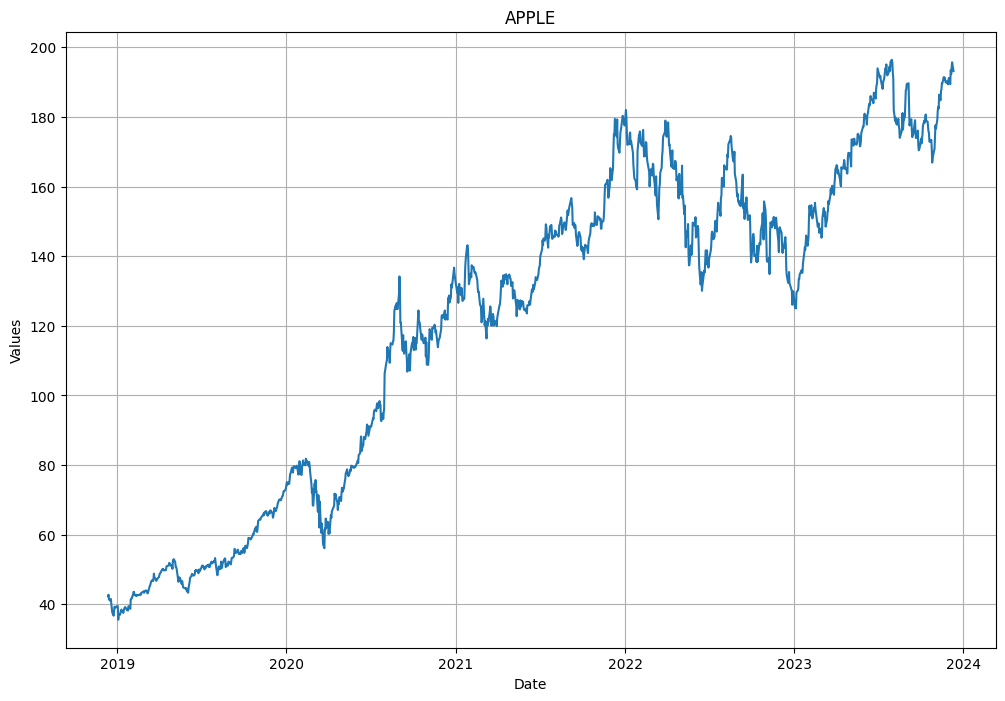

In [ ]:
# We represent our time series
plt.figure(figsize=(12, 8))
plt.plot(ts_close['Close'])
plt.title('APPLE')
plt.xlabel('Date')
plt.ylabel('Values')
plt.grid(True)
plt.show()

In [ ]:
# For our model we have to remove missing data(we only have a few of them, corresponding to Public holidays)
#We also need to shape our data correctly to match it with what the model wants
ts_close = ts_close.values
ts_close = ts_close.astype('float32')
ts_close = np.array(ts_close[~np.isnan(ts_close)])
ts_close = ts_close.reshape(-1,1)
print(f"After removing missing data, our data consists of {len(ts_close)} rows")
ts_close

After removing missing data, our data consists of 1258 rows


array([[ 42.275 ],
       [ 42.7375],
       [ 41.37  ],
       ...,
       [194.27  ],
       [195.71  ],
       [193.18  ]], dtype=float32)

In [ ]:
train_size = int(len(ts_close)*0.80)
test_size = len(ts_close)-train_size

# We can now create the training data set and the test data set
train_close = ts_close[0:train_size,:]
test_close = ts_close[train_size:len(ts_close),:]
print("Size of the train data set:", len(train_close))
print("Size of the test data set:", len(test_close))

Size of the train data set: 1006
Size of the test data set: 252


In [ ]:
#The LSTM model needs our data to be scaled in order to be efficient, we use a standard scaler but we could use a minmax scaler for example
# Here, we fit our scaler on the train and apply the same scaler on our test data set
scaler = StandardScaler()
scaler.fit(train_close)
train_close = scaler.transform(train_close)
test_close = scaler.transform(test_close)

In [ ]:
#We then need to create sequences which will be used to predict each new value. We should not use a sequence size too big to avoid overfitting
#but we assume that the values are correlated to several values in the past
from keras.preprocessing.sequence import TimeseriesGenerator
seq_size = 10
batch_size = 1
train_generator = TimeseriesGenerator(train_close, train_close, length = seq_size, stride = 1, batch_size = batch_size)
print("size of the train set :", len(train_close))
print("size of the train_generator :", len(train_generator))

size of the train set : 1006
size of the train_generator : 996


In [ ]:
# Illustrating what TimeseriesGenerator does
x_0, y_0 = train_generator[0]
print("first sequence")
print(x_0)
print(y_0)

x_1, y_1 = train_generator[1]
print("second sequence")
print(x_1)
print(y_1)

first sequence
[[[-1.5320026]
  [-1.5214583]
  [-1.5526353]
  [-1.5614128]
  [-1.5492725]
  [-1.5787966]
  [-1.601937 ]
  [-1.6367049]
  [-1.6589334]
  [-1.5999992]]]
[[-1.605813]]
second sequence
[[[-1.5214583]
  [-1.5526353]
  [-1.5614128]
  [-1.5492725]
  [-1.5787966]
  [-1.601937 ]
  [-1.6367049]
  [-1.6589334]
  [-1.5999992]
  [-1.605813 ]]]
[[-1.6053569]]


In [ ]:
#Same as for the train set for the test set
val_generator = TimeseriesGenerator(test_close, test_close, length = seq_size, stride = 1, batch_size = batch_size)
print("size of the validation set:", len(test_close))
print("size of the val_generator:", len(val_generator))

size of the validation set: 252
size of the val_generator: 242


In [ ]:
# Creation of the RNN-LSTM architecture
num_features = 1
modelLSTM = Sequential()
modelLSTM.add(LSTM(units=50, activation = 'relu', return_sequences=True, input_shape=(seq_size, num_features)))
modelLSTM.add(LSTM(units=50, activation = 'relu'))
modelLSTM.add(Dense(1))
modelLSTM.compile(optimizer='adam', loss='mean_squared_error')

modelLSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Creation of the RNN-GRU architecture
modelGRU = Sequential()
modelGRU.add(GRU(units=50, activation='tanh', return_sequences=True, input_shape=(seq_size, num_features)))
modelGRU.add(GRU(units=50, activation='tanh'))
modelGRU.add(Dense(units=1))
modelGRU.compile(optimizer='adam', loss='mean_squared_error')

modelGRU.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 10, 50)            7950      
                                                                 
 gru_1 (GRU)                 (None, 50)                15300     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 23301 (91.02 KB)
Trainable params: 23301 (91.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Model training and predictions

historyLSTM = modelLSTM.fit_generator(generator = train_generator, verbose = 2, epochs = 10, validation_data = val_generator)

train_predLSTM = modelLSTM.predict(train_generator)

test_predLSTM = modelLSTM.predict(val_generator)

Epoch 1/10


<ipython-input-19-a4ab7b669aaf>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  historyLSTM = modelLSTM.fit_generator(generator = train_generator, verbose = 2, epochs = 10, validation_data = val_generator)


996/996 - 26s - loss: 0.0361 - val_loss: 0.0097 - 26s/epoch - 26ms/step
Epoch 2/10
996/996 - 16s - loss: 0.0114 - val_loss: 0.0050 - 16s/epoch - 16ms/step
Epoch 3/10
996/996 - 10s - loss: 0.0091 - val_loss: 0.0061 - 10s/epoch - 10ms/step
Epoch 4/10
996/996 - 11s - loss: 0.0072 - val_loss: 0.0031 - 11s/epoch - 11ms/step
Epoch 5/10
996/996 - 10s - loss: 0.0066 - val_loss: 0.0250 - 10s/epoch - 10ms/step
Epoch 6/10
996/996 - 10s - loss: 0.0061 - val_loss: 0.0340 - 10s/epoch - 10ms/step
Epoch 7/10
996/996 - 11s - loss: 0.0053 - val_loss: 0.0027 - 11s/epoch - 11ms/step
Epoch 8/10
996/996 - 10s - loss: 0.0054 - val_loss: 0.0289 - 10s/epoch - 10ms/step
Epoch 9/10
996/996 - 10s - loss: 0.0053 - val_loss: 0.0030 - 10s/epoch - 10ms/step
Epoch 10/10
996/996 - 14s - loss: 0.0050 - val_loss: 0.0028 - 14s/epoch - 14ms/step
242/242 [==============================] - 1s 4ms/step


In [ ]:
# Model training and predictions

historyGRU = modelGRU.fit_generator(generator = train_generator, verbose = 2, epochs = 10, validation_data = val_generator)

train_predGRU = modelGRU.predict(train_generator)

test_predGRU = modelGRU.predict(val_generator)


Epoch 1/10


<ipython-input-20-0bb283084724>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  historyGRU = modelGRU.fit_generator(generator = train_generator, verbose = 2, epochs = 10, validation_data = val_generator)


996/996 - 17s - loss: 0.0096 - val_loss: 0.0050 - 17s/epoch - 17ms/step
Epoch 2/10
996/996 - 11s - loss: 0.0056 - val_loss: 0.0059 - 11s/epoch - 11ms/step
Epoch 3/10
996/996 - 11s - loss: 0.0049 - val_loss: 0.0031 - 11s/epoch - 11ms/step
Epoch 4/10
996/996 - 11s - loss: 0.0049 - val_loss: 0.0041 - 11s/epoch - 11ms/step
Epoch 5/10
996/996 - 11s - loss: 0.0046 - val_loss: 0.0041 - 11s/epoch - 12ms/step
Epoch 6/10
996/996 - 11s - loss: 0.0045 - val_loss: 0.0066 - 11s/epoch - 11ms/step
Epoch 7/10
996/996 - 12s - loss: 0.0046 - val_loss: 0.0043 - 12s/epoch - 12ms/step
Epoch 8/10
996/996 - 12s - loss: 0.0043 - val_loss: 0.0032 - 12s/epoch - 12ms/step
Epoch 9/10
996/996 - 12s - loss: 0.0048 - val_loss: 0.0051 - 12s/epoch - 12ms/step
Epoch 10/10
996/996 - 11s - loss: 0.0042 - val_loss: 0.0029 - 11s/epoch - 11ms/step
242/242 [==============================] - 1s 4ms/step


In [ ]:
# Now, in order to reprensent graphically and calculate the error, we rescaled the data
train_predLSTM = scaler.inverse_transform(train_predLSTM)
train_predGRU = scaler.inverse_transform(train_predGRU)
y_train_rescaled = scaler.inverse_transform(train_close)
test_predLSTM = scaler.inverse_transform(test_predLSTM)
test_predGRU = scaler.inverse_transform(test_predGRU)
y_test_rescaled = scaler.inverse_transform(test_close)

In [ ]:
print(len(train_close))
print(len(train_predLSTM))
print(len(train_predGRU))

1006
996
996


In [ ]:
# We measure the error with the RMSE score
train_scoreLSTM = math.sqrt(mean_squared_error(y_train_rescaled[seq_size:], train_predLSTM))
print(f"train set score for the LSTM : {train_scoreLSTM} RMSE")
train_scoreGRU = math.sqrt(mean_squared_error(y_train_rescaled[seq_size:], train_predGRU))
print(f"train set score for the GRU : {train_scoreGRU} RMSE")

test_scoreLSTM = math.sqrt(mean_squared_error(y_test_rescaled[seq_size:], test_predLSTM))
print(f"test set score for the LSTM model : {test_scoreLSTM} RMSE")
test_scoreGRU = math.sqrt(mean_squared_error(y_test_rescaled[seq_size:], test_predGRU))
print(f"test set score for the GRU model : {test_scoreGRU} RMSE")

train set score for the LSTM : 2.4684033693744647 RMSE
train set score for the GRU : 3.206868435888834 RMSE
test set score for the LSTM model : 2.301229281106868 RMSE
test set score for the GRU model : 2.346529418858437 RMSE


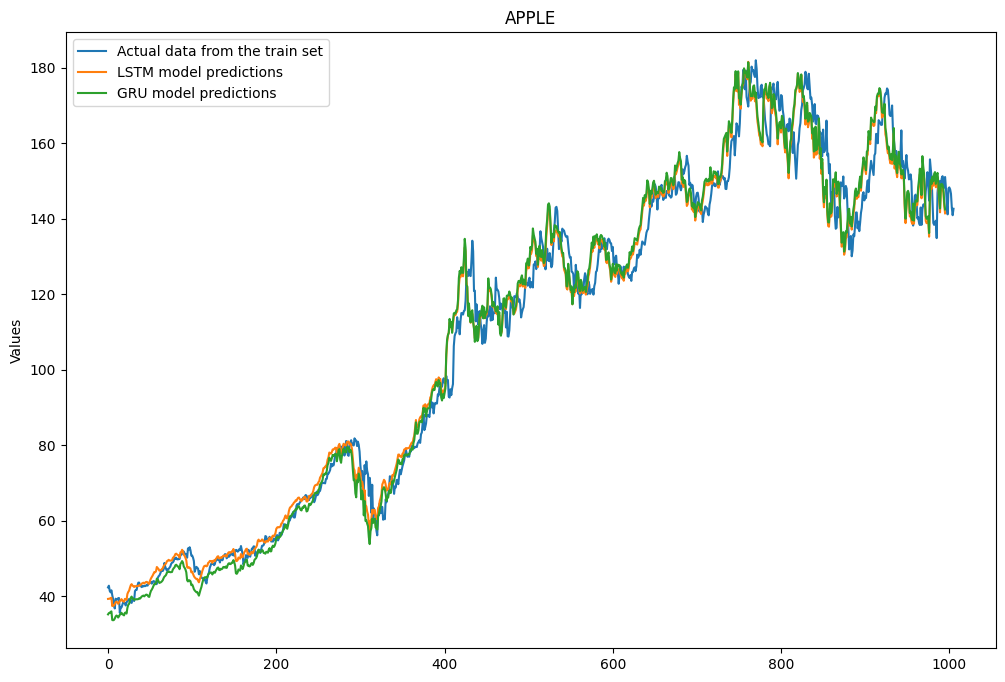

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(y_train_rescaled, label="Actual data from the train set")
plt.plot(train_predLSTM, label='LSTM model predictions')
plt.plot(train_predGRU, label='GRU model predictions')
plt.title('APPLE')
plt.ylabel('Values')
plt.plot()
plt.legend()
plt.show()

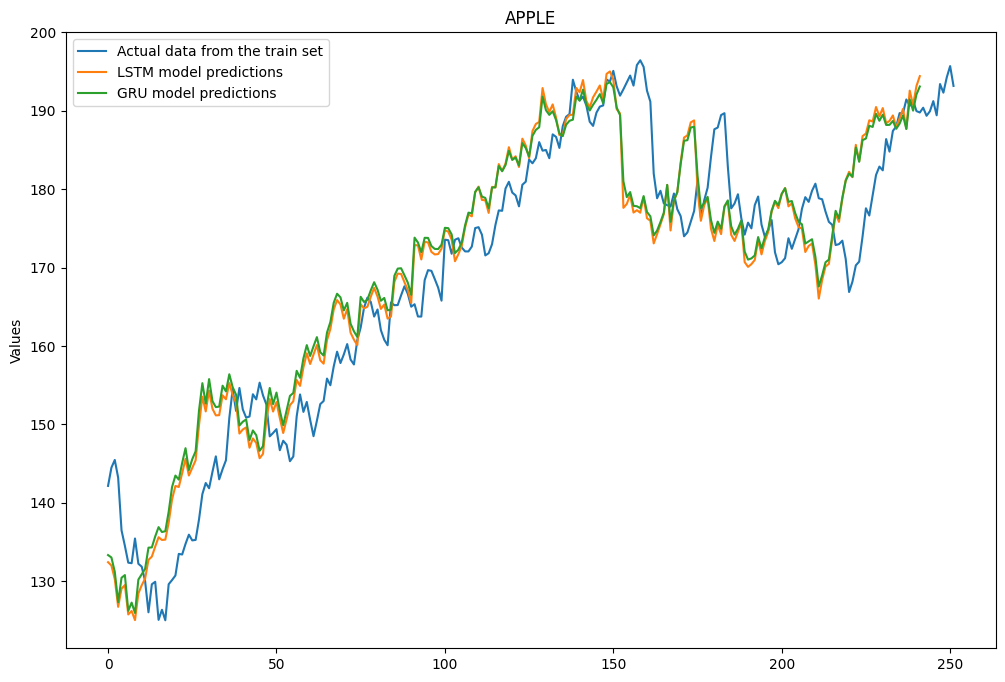

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(y_test_rescaled, label="Actual data from the train set")
plt.plot(test_predLSTM, label='LSTM model predictions')
plt.plot(test_predGRU, label='GRU model predictions')
plt.title('APPLE')
plt.ylabel('Values')
plt.plot()
plt.legend()
plt.show()